Image shape: (128, 128)
Labels: [('rectangle', ((np.int64(64), np.int64(82)), (np.int64(80), np.int64(96))))]


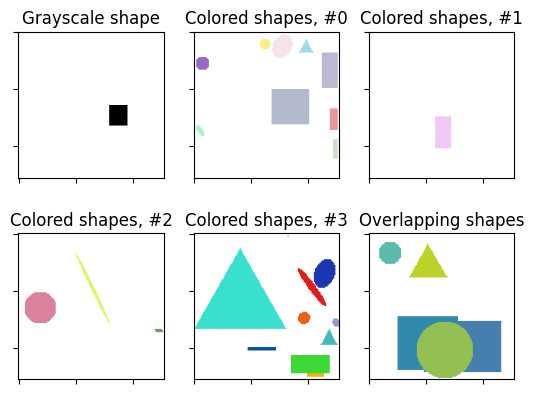

In [1]:
import matplotlib.pyplot as plt

from skimage.draw import random_shapes

# Let's start simple and generate a 128x128 image
# with a single grayscale rectangle.
result = random_shapes(
    (128, 128), max_shapes=1, shape='rectangle', channel_axis=None, rng=0
)

# We get back a tuple consisting of (1) the image with the generated shapes
# and (2) a list of label tuples with the kind of shape (e.g. circle,
# rectangle) and ((r0, r1), (c0, c1)) coordinates.
image, labels = result
print(f'Image shape: {image.shape}\nLabels: {labels}')

# We can visualize the images.
fig, axes = plt.subplots(nrows=2, ncols=3)
ax = axes.ravel()
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Grayscale shape')

# The generated images can be much more complex. For example, let's try many
# shapes of any color. If we want the colors to be particularly light, we can
# set the `intensity_range` to an upper subrange of (0,255).
image1, _ = random_shapes((128, 128), max_shapes=10, intensity_range=((100, 255),))

# Moar :)
image2, _ = random_shapes((128, 128), max_shapes=10, intensity_range=((200, 255),))
image3, _ = random_shapes((128, 128), max_shapes=10, intensity_range=((50, 255),))
image4, _ = random_shapes((128, 128), max_shapes=10, intensity_range=((0, 255),))

for i, image in enumerate([image1, image2, image3, image4], 1):
    ax[i].imshow(image)
    ax[i].set_title(f'Colored shapes, #{i-1}')

# These shapes are well suited to test segmentation algorithms. Often, we
# want shapes to overlap to test the algorithm. This is also possible:
image, _ = random_shapes(
    (128, 128), min_shapes=5, max_shapes=10, min_size=20, allow_overlap=True
)
ax[5].imshow(image)
ax[5].set_title('Overlapping shapes')

for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])

plt.show()